# Projeto german credit risk

In [1]:
import requests
import logging
import zipfile
import pandas as pd

from pathlib import Path

In [2]:
DATA_DIR = Path.cwd().parent / 'data'

In [3]:
def load_data(data_dir: Path = DATA_DIR) -> pd.DataFrame:
    pickle_file_path = data_dir / 'data.pkl'
    if not pickle_file_path.exists():
        data_dir.mkdir(parents=True, exist_ok=True)

        url = 'https://archive.ics.uci.edu/static/public/144/statlog+german+credit+data.zip'
        response = requests.get(url)
        if response.status_code != 200:
            logging.info('Failed to download dataset.')
            return None

        file_path = data_dir / 'data.zip'
        with open(file_path, 'wb') as file:
            file.write(response.content)
        logging.info('Dataset downloaded successfully.')

        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall(path=data_dir)

        columns = [
            'status',
            'duration',
            'history',
            'purpose',
            'amount',
            'savings',
            'employment',
            'installment',
            'status_sex',
            'guarantors',
            'residence',
            'property_type',
            'age',
            'plans',
            'housing',
            'credits',
            'job',
            'dependents',
            'telephone',
            'foreign',
            'target',
        ]
        data = pd.read_csv(
            data_dir / 'german.data',
            sep=' ', 
            header=None, 
            names=columns,
        )

        data.to_pickle(pickle_file_path)
    else:
        data = pd.read_pickle(pickle_file_path)

    return data

In [4]:
data = load_data()

# Análise exploratória

In [5]:
data.head().transpose()

,0,1,2,3,4
status,A11,A12,A14,A11,A11
duration,6,48,12,42,24
history,A34,A32,A34,A32,A33
purpose,A43,A43,A46,A42,A40
amount,1169,5951,2096,7882,4870
savings,A65,A61,A61,A61,A61
employment,A75,A73,A74,A74,A73
installment,4,2,2,2,3
status_sex,A93,A92,A93,A93,A93
guarantors,A101,A101,A101,A103,A101


In [6]:
data.shape

(1000, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status         1000 non-null   object
 1   duration       1000 non-null   int64 
 2   history        1000 non-null   object
 3   purpose        1000 non-null   object
 4   amount         1000 non-null   int64 
 5   savings        1000 non-null   object
 6   employment     1000 non-null   object
 7   installment    1000 non-null   int64 
 8   status_sex     1000 non-null   object
 9   guarantors     1000 non-null   object
 10  residence      1000 non-null   int64 
 11  property_type  1000 non-null   object
 12  age            1000 non-null   int64 
 13  plans          1000 non-null   object
 14  housing        1000 non-null   object
 15  credits        1000 non-null   int64 
 16  job            1000 non-null   object
 17  dependents     1000 non-null   int64 
 18  telephone      1000 non-null 

In [8]:
categorical_features = [
    'status',
    'history',
    'purpose',
    'savings',
    'employment',
    'status_sex',
    'guarantors',
    'property_type',
    'plans',
    'housing',
    'job',
    'telephone',
    'foreign',
]

numerical_features = [
    'duration', 
    'amount', 
    'installment', 
    'residence', 
    'age', 
    'credits', 
    'dependents', 
]

In [9]:
X = data.drop(columns=['target']).copy()
y = data['target'].copy()

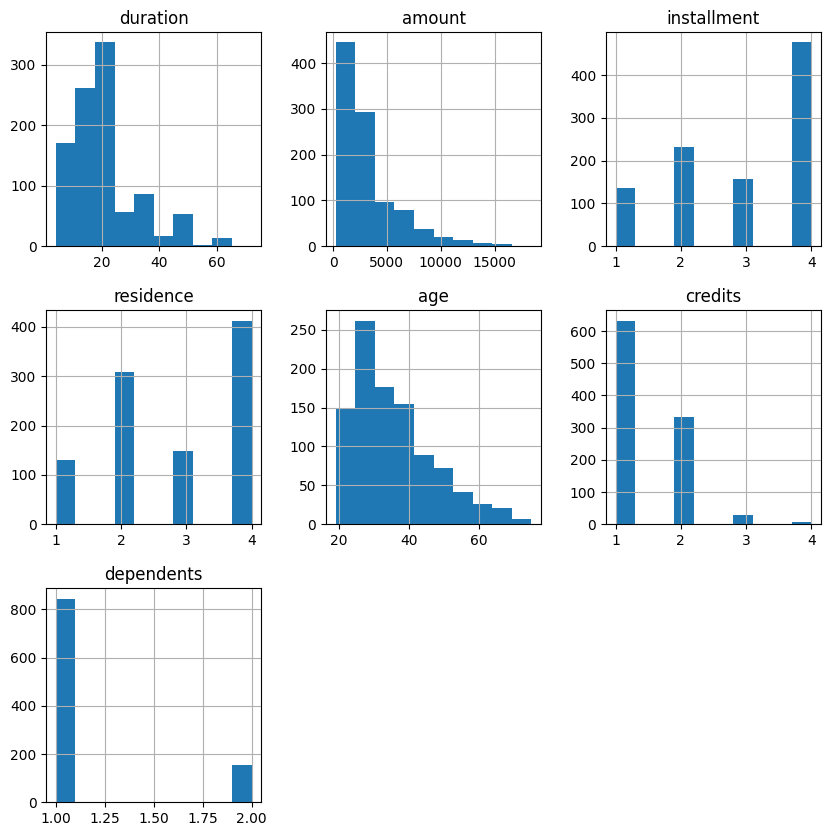

In [10]:
X.hist(figsize=(10, 10));

In [11]:
for col in categorical_features:
    print(X[col].value_counts().sort_index())

status
A11    274
A12    269
A13     63
A14    394
Name: count, dtype: int64
history
A30     40
A31     49
A32    530
A33     88
A34    293
Name: count, dtype: int64
purpose
A40     234
A41     103
A410     12
A42     181
A43     280
A44      12
A45      22
A46      50
A48       9
A49      97
Name: count, dtype: int64
savings
A61    603
A62    103
A63     63
A64     48
A65    183
Name: count, dtype: int64
employment
A71     62
A72    172
A73    339
A74    174
A75    253
Name: count, dtype: int64
status_sex
A91     50
A92    310
A93    548
A94     92
Name: count, dtype: int64
guarantors
A101    907
A102     41
A103     52
Name: count, dtype: int64
property_type
A121    282
A122    232
A123    332
A124    154
Name: count, dtype: int64
plans
A141    139
A142     47
A143    814
Name: count, dtype: int64
housing
A151    179
A152    713
A153    108
Name: count, dtype: int64
job
A171     22
A172    200
A173    630
A174    148
Name: count, dtype: int64
telephone
A191    596
A192    404
Name: c

In [12]:
import matplotlib.pyplot as plt

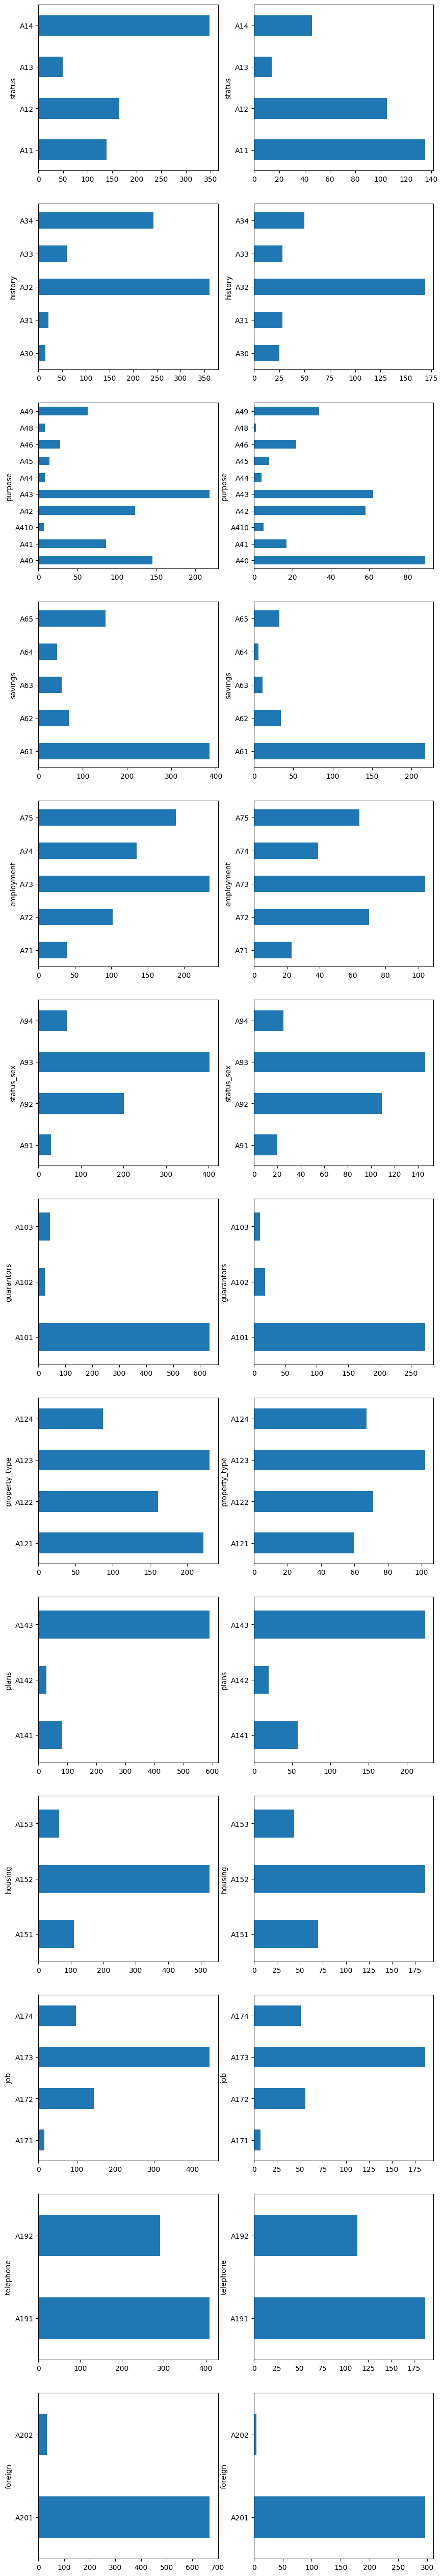

In [13]:
num_categorical = len(categorical_features)

plt.figure(figsize=(10, 5*num_categorical))

k = 1
for col in categorical_features:
    plt.subplot(num_categorical, 2, k)
    X[y==1][col].value_counts().sort_index().plot.barh()
    k += 1
    plt.subplot(num_categorical, 2, k)
    X[y==2][col].value_counts().sort_index().plot.barh()
    k += 1
    

In [14]:
import seaborn as sns

/home/fjayres/Dropbox/Insper/Disciplinas/MachineLearning-EngComp/Aulas/07 - Projeto/german/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fjayres/Dropbox/Insper/Disciplinas/MachineLearning-EngComp/Aulas/07 - Projeto/german/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fjayres/Dropbox/Insper/Disciplinas/MachineLearning-EngComp/Aulas/07 - Projeto/german/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtyp

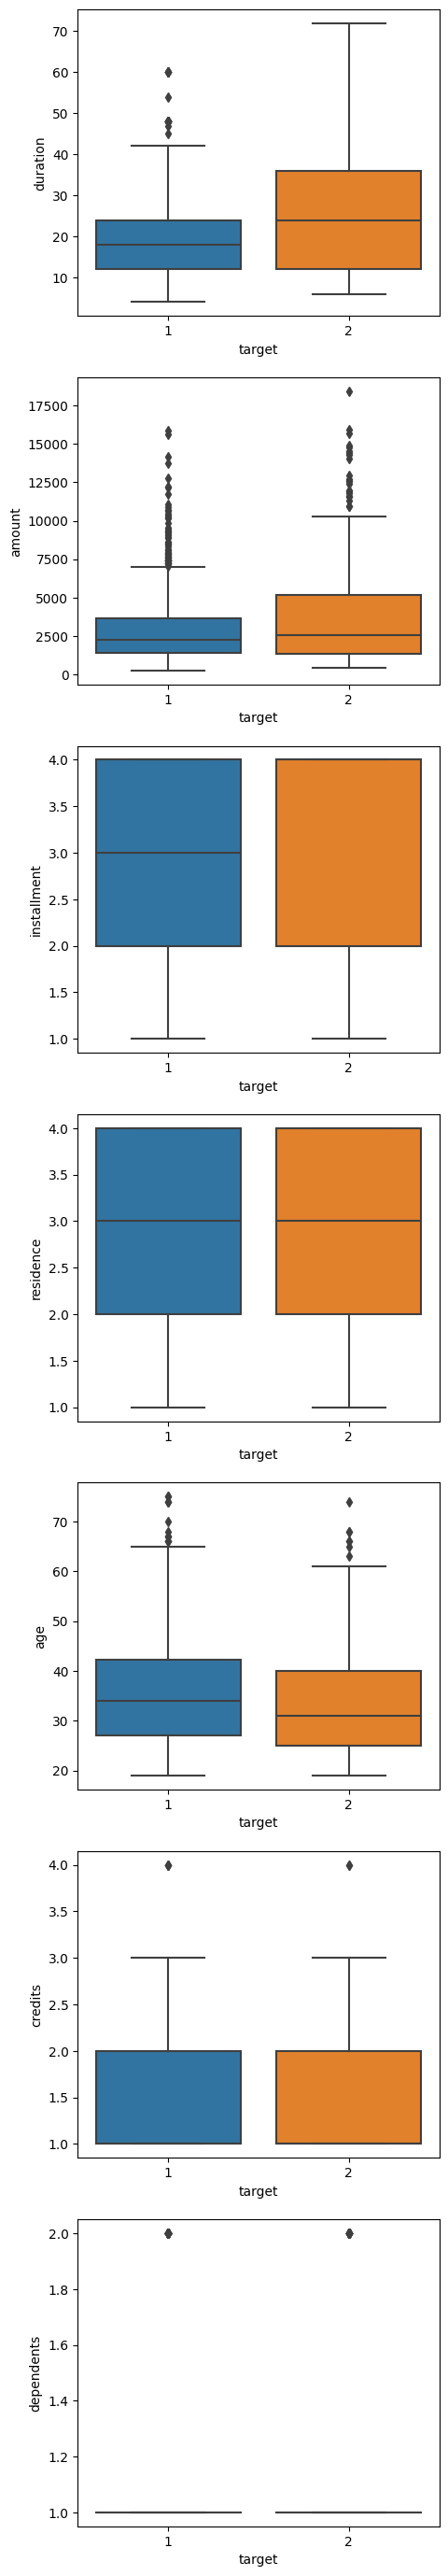

In [15]:
num_numerical = len(numerical_features)
plt.figure(figsize=(5, 5*num_numerical))
k = 1
for col in numerical_features:
    plt.subplot(num_numerical, 1, k)
    sns.boxplot(x='target', y=col, data=data)
    k += 1

# Preparando os dados

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,)
X_train_valid, X_test_valid, y_train_valid, y_test_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [18]:
pipeline = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', sparse=False), categorical_features),
    ('num', 'passthrough', numerical_features),
])

In [19]:
X_train_valid_transf = pipeline.fit_transform(X_train_valid)
X_test_valid_transf = pipeline.transform(X_test_valid)

/home/fjayres/Dropbox/Insper/Disciplinas/MachineLearning-EngComp/Aulas/07 - Projeto/german/env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Modelos

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [21]:
model_lr = LogisticRegression(solver='liblinear')
model_rf = RandomForestClassifier()
model_knn = KNeighborsClassifier()

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
for name, model in zip(['LogisticRegression', 'RandomForestClassifier', 'KNeighborsClassifier'], [model_lr, model_rf, model_knn]):
    model.fit(X_train_valid_transf, y_train_valid)
    y_pred = model.predict(X_test_valid_transf)
    accuracy = accuracy_score(y_test_valid, y_pred)
    print(name, accuracy)

LogisticRegression 0.725
RandomForestClassifier 0.725
KNeighborsClassifier 0.68125
